<a href="https://colab.research.google.com/github/Appendme/big_data_analysis/blob/master/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [ ]:
df = pd.read_csv('samples/rpi_data_compact.csv')
df.dropna(inplace = True)
df.dtypes

Unnamed: 0             int64
Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
df[['Ping (ms)', 'Download (Mbit/s)']] = df[['Ping (ms)', 'Download (Mbit/s)']].apply(pd.to_numeric)
df.dtypes

Unnamed: 0             int64
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
df = df.reindex(columns = list(df.columns)[1::][::-1])
df.head()

,Time,Date,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
0,13:36:25,2016-11-24,14.31,91.80,26.992
1,13:36:55,2016-11-24,14.12,88.19,24.532
2,13:37:25,2016-11-24,14.11,59.86,20.225
3,13:37:57,2016-11-24,14.22,91.81,19.332
4,13:38:27,2016-11-24,14.08,92.05,22.494


In [ ]:
print(list(df.columns))
print(df.columns[1::][::-1])

['Time', 'Date', 'Upload (Mbit/s)', 'Download (Mbit/s)', 'Ping (ms)']
Index(['Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)', 'Date'], dtype='object')


In [ ]:
df.to_csv('samples/rpi_data_processed.csv')

In [31]:
means = df.mean(axis = 0)
stands = df.std(axis = 0)

m_upload, m_download, m_ping = means
s_upload, s_download, s_ping = stands

print(f'Avg ping time: {m_ping} ± {s_ping} ms')
print(f'Avg download speed: {m_download} ± {s_download} Mbit/s')
print(f'Avg upload speed: {m_upload} ± {s_upload} Mbit/s')

Avg ping time: 21.115451708766724 ± 5.161225495663228 ms
Avg download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Avg upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


In [43]:
mins = df[df.columns[2::]].min()
maxs = df[df.columns[2::]].max()

min_upload, min_download, min_ping = mins
max_upload, max_download, max_ping = maxs

print(f'Min ping time: {min_ping} ms. Max ping time: {max_ping} ms')
print(f'Min download speed: {min_download} Mbit/s. Max download speed: {max_download} Mbit/s')
print(f'Min upload speed: {min_upload} Mbit/s. Max upload speed: {max_upload} Mbit/s')

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [44]:
df.describe()

,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
count,673.000000,673.000000,673.000000
mean,13.697608,90.449212,21.115452
std,1.080471,3.465647,5.161225
min,6.210000,58.480000,16.167000
25%,13.640000,90.220000,19.115000
50%,13.980000,91.560000,20.322000
75%,14.180000,92.070000,21.843000
max,14.550000,92.870000,76.528000


In [53]:
argmin_ping = df['Ping (ms)'].argmin()
argmax_ping = df['Ping (ms)'].argmax()

argmin_down = df['Download (Mbit/s)'].argmin()
argmax_down = df['Download (Mbit/s)'].argmax()

argmin_upload = df['Upload (Mbit/s)'].argmin()
argmax_upload = df['Upload (Mbit/s)'].argmax()

print(f'Min ping arg: {argmin_ping} ms. Max ping arg: {argmax_ping} ms')
print(f'Min download arg: {argmin_down} Mbit/s. Max download arg: {argmax_down} Mbit/s')
print(f'Min upload arg: {argmin_upload} Mbit/s. Max upload arg: {argmax_upload} Mbit/s')

Min ping arg: 217 ms. Max ping arg: 461 ms
Min download arg: 161 Mbit/s. Max download arg: 407 Mbit/s
Min upload arg: 464 Mbit/s. Max upload arg: 524 Mbit/s


In [70]:
print(f'Ping measure reached minimum on {df.iloc[argmin_ping][1]} at {df.iloc[argmin_ping][0]}')
print(f'Download measure reached minimum on {df.iloc[argmin_down][1]} at {df.iloc[argmin_down][0]}')
print(f'Upload measure reached minimum on {df.iloc[argmin_upload][1]} at {df.iloc[argmin_upload][0]}')

print(f'Ping measure reached maximum on {df.iloc[argmax_ping][1]} at {df.iloc[argmax_ping][0]}')
print(f'Download measure reached maximum on {df.iloc[argmax_down][1]} at {df.iloc[argmax_down][0]}')
print(f'Upload measure reached maximum on {df.iloc[argmax_upload][1]} at {df.iloc[argmax_upload][0]}')

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [80]:
corr = df.corr()
corr

,Upload (Mbit/s),Download (Mbit/s),Ping (ms)
Upload (Mbit/s),1.000000,0.083690,-0.463099
Download (Mbit/s),0.083690,1.000000,-0.045626
Ping (ms),-0.463099,-0.045626,1.000000


In [81]:
corr = corr.values
print(f'Correlation coefficient between ping and download: {corr[0, 1]}')
print(f'Correlation coefficient between ping and upload: {corr[0, 2]}')
print(f'Correlation coefficient between upload and download: {corr[2, 1]}')

Correlation coefficient between ping and download: 0.08368996933725129
Correlation coefficient between ping and upload: -0.46309871383001827
Correlation coefficient between upload and download: -0.04562611025837995


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline 

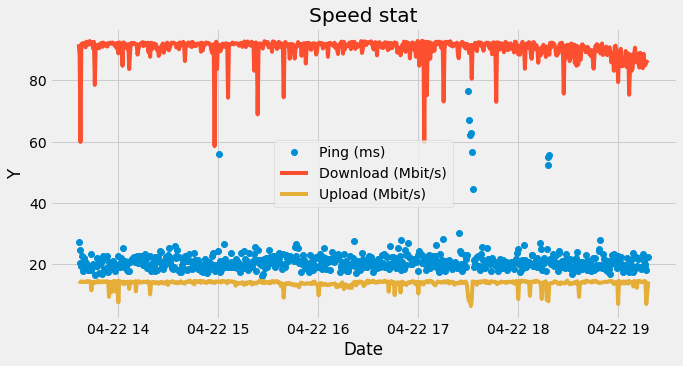

In [104]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))

    t = pd.to_datetime(df['Time'])
    ax.plot(t, df['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')
    ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')

    ax.set_xlabel('Date')
    ax.set_ylabel('Y')
    ax.set_title("Speed stat")

    ax.legend()
    ax.tick_params(labelsize=14)
    plt.show()

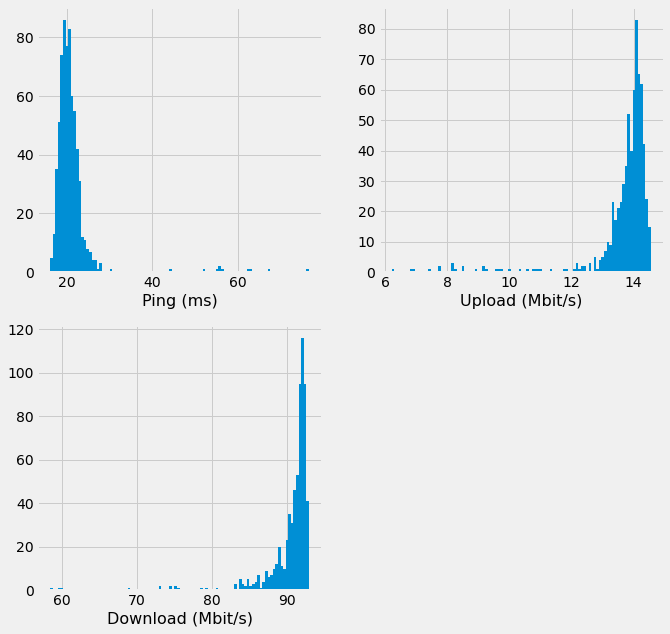

In [102]:
# Code Cell 37
with plt.style.context('fivethirtyeight'):
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0][0].hist(df['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)

In [ ]:
print("Выполнил: Коновалов С.В.")